# Networks / Graph Theory

Graph theory, or network analysis, is a crucial part of the data science toolkit. It offers a perspective that significantly deviates from the classic tabular or relational data models, enabling us to model, understand, and navigate complex systems of interaction and connection.

### Why Do We Need Graphs for Data Science?

Consider the variety of real-world systems that can be understood as networks or graphs:

- **Information Technology Networks:** These include the internet (a vast network of computers and servers), telephone networks, and local computer networks. Each node represents a device or server, and each edge is a communication link.
- **Transportation Networks:** The systems that connect locations, like road networks, railway networks, waterways, and even networks for utilities like water, gas, and electricity. Here, nodes could represent stations, intersections, or locations, and edges the routes or pathways between them.
- **Social Networks:** And this does not just refer to social media! It could include networks of friendships, relationships, professional contacts, memberships in clubs or organizations, and more. Nodes represent individuals or entities, and edges represent relationships or interactions between them.
- **Biological Networks:** Within biology, networks can represent protein interactions, gene regulation, neural connections, food webs, and much more. Nodes in these networks could be anything from individual organisms to specific genes, with edges indicating different types of biological interaction.

The beauty of graph theory is its generalizability. The same mathematical principles and techniques can be used to explore, analyze, and draw conclusions from all these diverse networks.

### What is a Graph, What is a Network?

To delve deeper, we need to understand some key terms and components. Networks or graphs consist of two different types of elements: nodes and edges.

- **Nodes (or vertices):** These represent the entities within our system or dataset. Depending on the context, a node could represent a person, a computer, a protein, an intersection, or any other entity.
- **Edges (or links, connections):** These represent relationships or interactions between the entities. An edge could represent a physical connection (like a cable, road, rail, or pipe), a social or professional relationship, a communication channel, a biological interaction, and more.


Edges can be either directed or undirected, and weighted or unweighted. Undirected edges indicate a mutual or two-way interaction, while directed edges indicate a one-way interaction. Weighted edges carry additional information about the strength or magnitude of the interaction, while unweighted edges simply indicate the presence of an interaction.

```{figure} ../images/fig_graphs_types_weighted_directed.png
:name: fig_graphs01

Graphs come in different types or flavors. Key distinctions to make are whether or not links are directed or undirected. And whether or not link are weighted.
```

In the simplest form of a graph, we have unweighted and undirected edges, but real-world graphs often feature directed and/or weighted edges.

Finally, a network or graph has a count $N$ of nodes and a count $L$ of edges. The degree $k$ of a node is the number of links or connections it has. For directed graphs, we distinguish between in-degree and out-degree, that is, the number of incoming and outgoing links.

```{figure} ../images/fig_graphs_types_weighted_directed_degree.png
:name: fig_graphs02

The degree describes the number of links of a particular node. For directed graphs we distinguish in-degree and out-degree.
```

The standard library in Python for working with graphs is `networkx`. Comprehensive documentation is available at this link: https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf.

## Graphs in Python with `NetworkX`

If if comes to working with networks/graphs, the goto Python library is `NetworkX` {cite}`networkx2008`, which also comes with an [extensive documentation](https://networkx.org/documentation/stable/reference/index.html).
In addition, `NetworkX` also provides its own [tutorial material](https://networkx.org/documentation/stable/tutorial.html).

Here, we will do a quick introduction to NetworkX which we will then use for all graph-related parts in this course.

### Installation
NetworkX can simply be installed using `pip install networkx`, or from a Jupyter notebook, use  `!pip install networkx`.

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Import networkx
import networkx as nx
nx.__version__

'3.1'

### Create a graph object
We start by creating a graph object for an undirected graph using `nx.Graph()`.
To initiate a directed graph we can use `nx.DiGraph()`... but that will come a bit later.

In [24]:
G = nx.Graph()

In [25]:
print(G)  # this is a graph object, but has no nodes or edges

Graph with 0 nodes and 0 edges


### Add nodes and edges
What we initialized above is an empty graph. We can now add nodes and edges to the graph.

**Nodes** can be added:
- individually with `.add_node(...)`
- many nodes at once with `.add_nodes_from(...)`

**Edges** can be added:
- individually with `.add_edge(...)`
- many nodes at once with `.add_edges_from(...)`

In [26]:
# add a single node
G.add_node("Alice")

# add all nodes from a list
G.add_nodes_from(["Peter", "Sally", "Klaus", "Leonora"])

In [27]:
# get the nodes
G.nodes

NodeView(('Alice', 'Peter', 'Sally', 'Klaus', 'Leonora'))

In [28]:
# add single edge
G.add_edge("Alice", "Peter")

# add edges from a list
G.add_edges_from([("Peter", "Klaus"),
                  ("Klaus", "Leonora"),
                  ("Klaus", "Sally"),
                  ("Sally", "Leonora"),
                  ("Leonora", "Peter"),
                 ])

In [29]:
# get the edges
G.edges

EdgeView([('Alice', 'Peter'), ('Peter', 'Klaus'), ('Peter', 'Leonora'), ('Sally', 'Klaus'), ('Sally', 'Leonora'), ('Klaus', 'Leonora')])

### Visualize the graph with NetworkX
To make it clear from the start, NetworkX is great for a lot of things. And it also allows you to quickly visualize a graph. But this is mostly to get a quick impression of the data and not so much to produce high-quality visuals. In particular to display larger networks, we can better use specialized software for network visualizations which we will cover in the next chapter.

For now, however, having a quick look at our graph is always better than simply reading lists of strings (or tuples of strings). So, let's see what we just created!

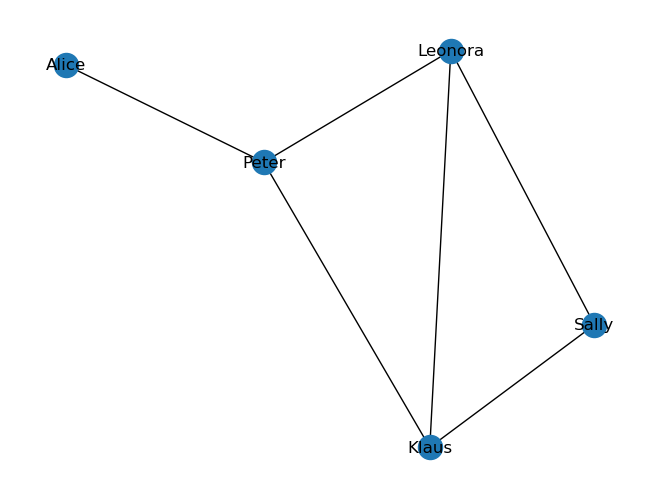

In [31]:
nx.draw(G, with_labels=True)

We see that some nodes have more connections (up to three in this example), while others have fewer connections, such as the node "Alice" with only one edge to another node ("Peter").
The number of edges (or links/connections/relationships) of an individual node is called **degree**.

With NetworkX we can quickly get the degrees of all nodes in a graph via the attribute `.degree`.

In [32]:
G.degree

DegreeView({'Alice': 1, 'Peter': 3, 'Sally': 2, 'Klaus': 3, 'Leonora': 3})

### Graph Metrics: Edge Count, Density, and Average Degree

To analyze networks, it's crucial to understand a few fundamental properties or metrics. These metrics can offer us insights into the structure and characteristics of the network, helping us interpret its overall behavior.

Some typical questions we might want to ask is:
- Has our graph many connections or rather few connections? (but then: what is many and what is few?)
- How many links do our nodes have (on average)?

#### Maximum Possible Number of Edges

One way to better judge if our graph has few or many edges is to first compute how many edges it *could have*. The **maximum possible number of edges**, denoted as $L_{max}$, in a network is given when every node is connected to every other node. In an undirected graph, this results in a complete graph where every pair of distinct vertices is connected by a unique edge. For a network with $N$ nodes, the maximum possible number of edges is:

$$ Lmax=\frac{N(N−1)}{2} $$

The division by 2 ensures that we are not double-counting edges since in an undirected graph, an edge between nodes A and B is the same as the edge between nodes B and A.

#### Density

The density $d$ of a graph provides a measure of how many edges the graph has in relation to the maximum possible number of edges ($L_{max}$). It is defined as the ratio of the actual number of edges $L$ to $L_{max}$:

$$
d = L/L_{max} = \frac{2L}{N(N-1)}
$$
The density can range between 0 and 1. A density close to 1 indicates that the graph is dense and most of the nodes are connected to each other, whereas a density close to 0 indicates that the graph is sparse with few edges.

#### Average Degree and Density

The average degree $\langle k \rangle$ of a graph is the mean number of edges per node. It's calculated by summing all node degrees and dividing by the total number of nodes $N$:

$$
\langle k \rangle = \frac{\sum	_i k_i}{N}
$$

We can also express the density of a graph in terms of the average degree. This provides a sense of how interconnected the nodes of a graph are on average, relative to the maximum possible degree ($N-1$):

$$
d = \frac{\langle k \rangle}{N-1}
$$

In the next sections, we will see how these metrics can be useful for understanding real-world networks and their properties. We'll also demonstrate how to calculate these metrics using the `networkx` Python library.

In [46]:
print(f"Number of nodes = {G.number_of_nodes()}")
print(f"Number of edges = {G.number_of_edges()}")
print(f"Maximum possible number of edges = {G.number_of_nodes() * (G.number_of_nodes() - 1) / 2}")
print(f"Density = {nx.density(G)}")  

# Code test
assert nx.density(G) == 0.6, "6 out of 10 possible edges --> 0.6"

Number of nodes = 5
Number of edges = 6
Maximum possible number of edges = 10.0
Density = 0.6


In [55]:
print(f"Average degree = {2 * G.number_of_edges() / G.number_of_nodes()}")
# or: print(f"Average degree = {np.mean([x[1] for x in G.degree])}")

Average degree = 2.4


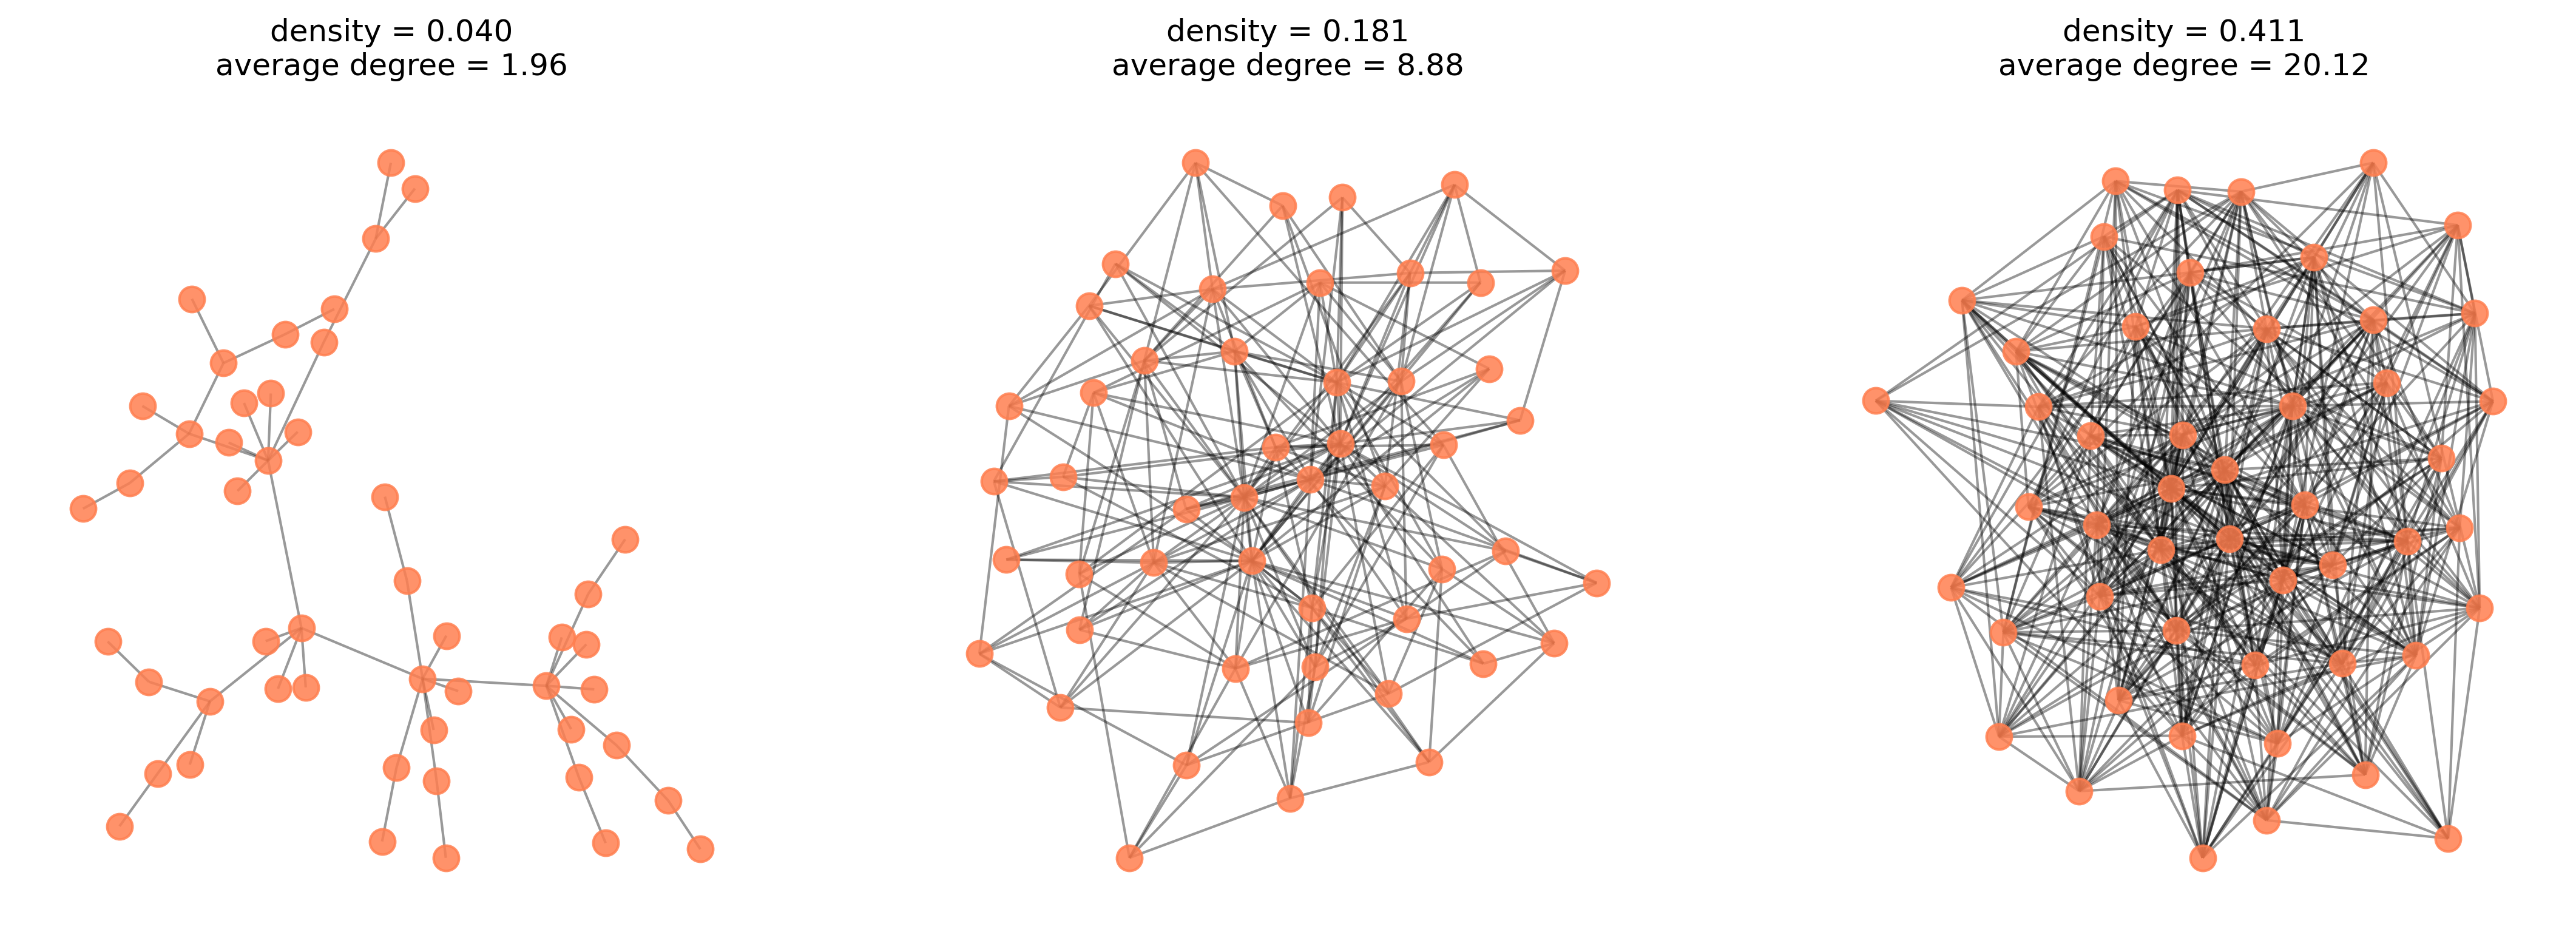

In [90]:
num_nodes = 50
plot_parameters = {"node_size": 100,
                   "node_color": "coral",
                   "alpha": 0.85
                  }

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), dpi=300)

# 1
G = nx.powerlaw_cluster_graph(num_nodes, 1, 0.2, seed=0)
pos = nx.spring_layout(G, k=0.1, seed=0)
nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax1)
nodes1 = nx.draw_networkx_nodes(G, pos, 
                                **plot_parameters,
                                ax=ax1,
                                )
ax1.set_title(f"density = {nx.density(G):.3f}" + \
              f"\naverage degree = {np.mean([x[1] for x in G.degree])}"
             )

# 2
G = nx.powerlaw_cluster_graph(num_nodes, 5, 0.2, seed=0)
pos = nx.spring_layout(G, k=0.1, seed=0)
nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax2)
nodes1 = nx.draw_networkx_nodes(G, pos,
                                **plot_parameters,
                                ax=ax2,
                                )
ax2.set_title(f"density = {nx.density(G):.3f}" + \
              f"\naverage degree = {np.mean([x[1] for x in G.degree])}"
             )

# 3
G = nx.powerlaw_cluster_graph(num_nodes, 15, 0.2, seed=0)
pos = nx.spring_layout(G, k=0.1, seed=0)
nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax3)
nodes1 = nx.draw_networkx_nodes(G, pos,
                                **plot_parameters,
                                ax=ax3,
                                )
ax3.set_title(f"density = {nx.density(G):.3f}" + \
              f"\naverage degree = {np.mean([x[1] for x in G.degree])}"
             )

ax1.axis('off')
ax2.axis("off")
ax3.axis("off")
# plt.savefig("fig_graphs_densities.svg")
plt.show()

## Not all graphs are connected

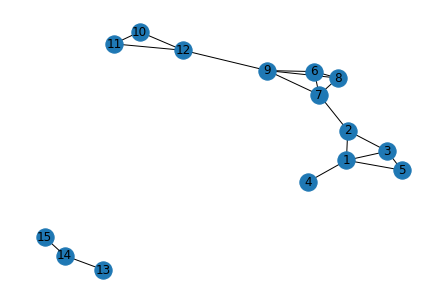

In [15]:
G = nx.Graph()
G.add_edges_from([[1,2], [2,3], [1,3], [1,4], [1,5], [3,5],
                  [6,7], [7,8], [8,9], [6,9], [6,8], [7,9],
                  [10,11], [11,12], [10,12], [9,12], [2,7],
                  [13, 14], [14, 15]])
nx.draw(G, with_labels=True)

---

## Directed graphs

In [ ]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2), (2,3),
    (3,2), (3,4),
    (3,5), (4,2),
    (4,5), (4,6),
    (5,6), (6,4),
])
nx.draw(D, with_labels=True)

In [ ]:
nx.draw(D, with_labels=True,
       node_color='teal',
       node_size=1500,
       font_color='white',
       width=2)

## Import network data

Hier schauen wir uns Flugverbindungen in den USA an `openflights_usa.graphml`

### EXERCISE 1

Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

### EXERCISE 2

If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

### EXERCISE 3

Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

---

## Node importance